### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

In [2]:
import numpy as np

In [3]:
m1 = np.array([[-1,0,0],[0,-1,0],[0,0,-1]])
print(m1)
print(m1 @ m1.T)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


b) верхнетреугольная, ортогональная:

In [76]:
m2 = np.triu([[0.1,0.2,0.3],[0.4,0.5,0.6],[0.7,0.8,0.9]],0)
print(m2)

[[0.10 0.20 0.30]
 [0.00 0.50 0.60]
 [0.00 0.00 0.90]]


c) нижнетреугольная, ортогональная:

In [77]:
m3 = np.tril([[0.1,0.2,0.3],[0.4,0.5,0.6],[0.7,0.8,0.9]],0)
print(m3)

[[0.10 0.00 0.00]
 [0.40 0.50 0.00]
 [0.70 0.80 0.90]]


d) матрица, у которой определитель = 1:

In [163]:
m = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 4]], dtype=np.float32)
det = np.linalg.det(m.T)
print(m)
print(det)

[[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 4.]]
1.0


P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц

In [103]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [177]:
a,v = np.linalg.eig(m)

In [178]:
for i in range(len(a)):
    print (f'Собственное значение - {a[i]}')
    print (f'Собственный вектор - {v[:,i]}')

Собственное значение - -0.2360679774997898
Собственный вектор - [-0.85065081  0.52573111]
Собственное значение - 4.23606797749979
Собственный вектор - [-0.52573111 -0.85065081]


In [179]:
v

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

### Уровень 1:

Найдите спектральное разложение матрицы

In [165]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [166]:
a,v = np.linalg.eig(m)

In [167]:
a

array([-0.23606798,  4.23606798])

In [169]:
v

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [171]:
D = np.diag(a)
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [172]:
S = np.transpose(v)
S

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [173]:
S_t = np.transpose(S)
S_t

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [175]:
np.dot(np.dot(S_t, D),S)

array([[1., 2.],
       [2., 3.]])

### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [27]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [28]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [29]:
X, y = load_digits(return_X_y=True)

In [30]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


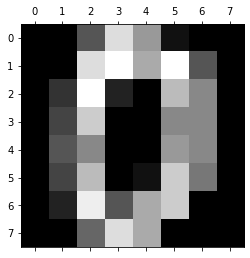

In [31]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [32]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668956057771

In [54]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9638286032276016

In [55]:
n_components = []
score = []

In [56]:
for k in range(4, X.shape[1], 2):
    svd = TruncatedSVD(n_components=k)
    X_reduced = svd.fit_transform(X)
    rf_reduced.fit(X_reduced, y)
    score_ = rf_reduced.oob_score_
    n_components.append(k)
    score.append(score_)    

In [59]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,8

Text(0, 0.5, 'oob_score')

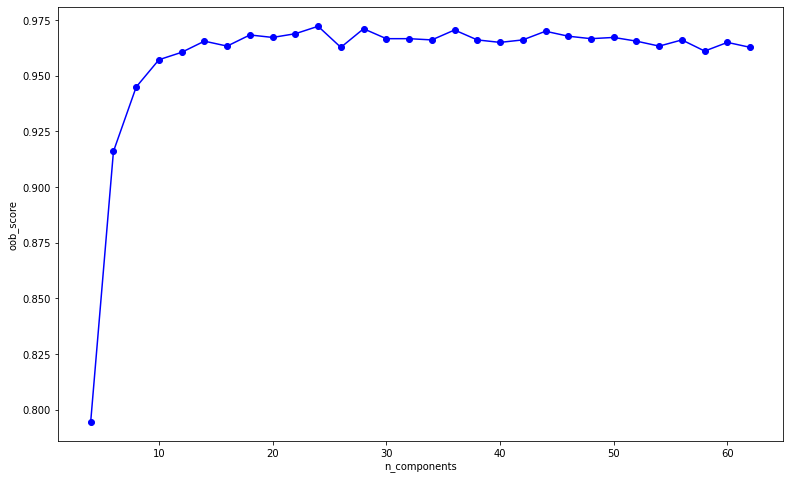

In [72]:
plt.plot(n_components, score, 'b')
plt.plot(n_components, score, 'bo')
plt.xlabel('n_components')
plt.ylabel('oob_score') 